In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



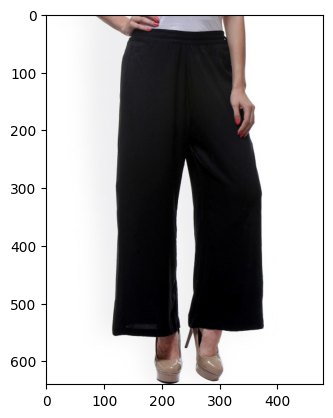

In [3]:
img=image.load_img(r"D:\AI\tro_cnn\testing\dark\822.jpg")
plt.imshow(img)

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


In [5]:
train_dataset=train.flow_from_directory(r'D:\AI\tro_cnn\testing',
                                        target_size=(200,200),
                                        batch_size=16,
                                        class_mode='sparse')
validation_dataset=validation.flow_from_directory(r'D:\AI\tro_cnn\validation',
                                             target_size=(200,200),
                                             batch_size=16,
                                             class_mode='sparse')


Found 269 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'dark': 0, 'light': 1}

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [10]:
model.fit(train_dataset,
          epochs=30,
          batch_size=10,
          validation_data=validation_dataset)


Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.4797 - loss: 3.4594 - val_accuracy: 0.5909 - val_loss: 0.6395
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.8656 - loss: 0.2943 - val_accuracy: 0.8864 - val_loss: 0.3544
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.9680 - loss: 0.1383 - val_accuracy: 0.9773 - val_loss: 0.0957
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.9963 - loss: 0.0435 - val_accuracy: 0.9545 - val_loss: 0.1337
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.9773 - val_loss: 0.1237
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.9507 - loss: 0.1373 - val_accuracy: 0.9545 - val_loss: 0.1165
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9545 - val_loss: 0.1337
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9318 - val_

In [13]:
model.save('tro_cnn.h5')

In [14]:
from keras.models import load_model
loaded_model = load_model('tro_cnn.h5')


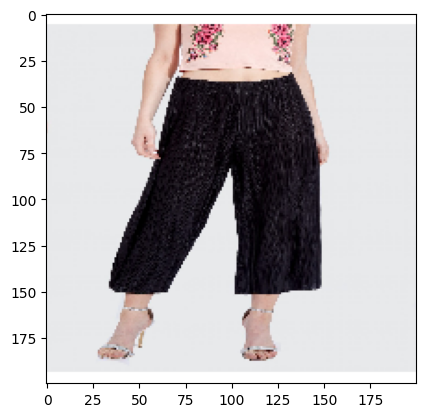

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dark


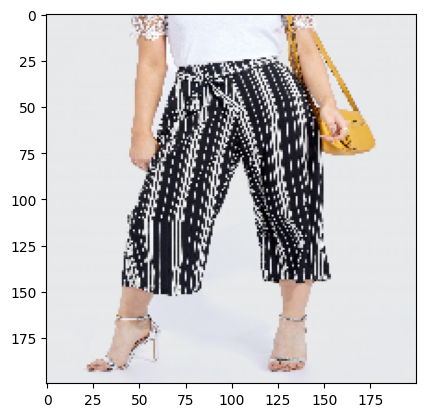

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dark


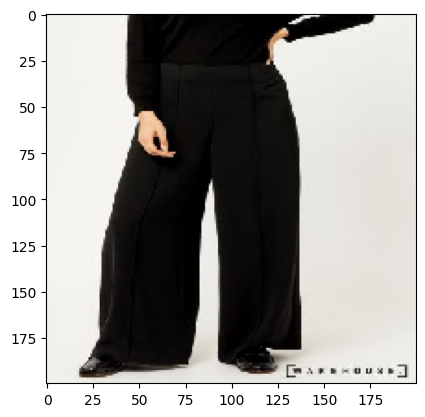

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Dark


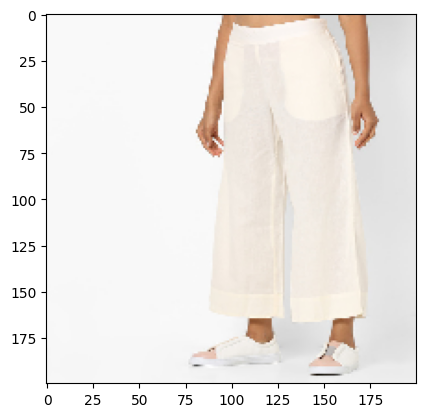

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Light


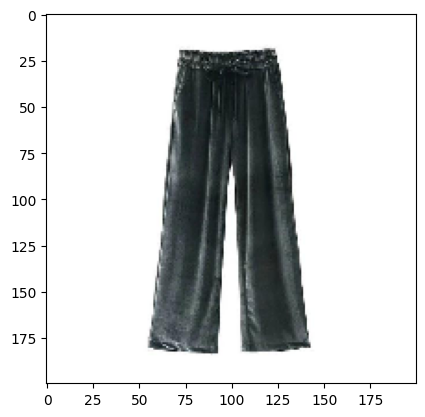

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dark


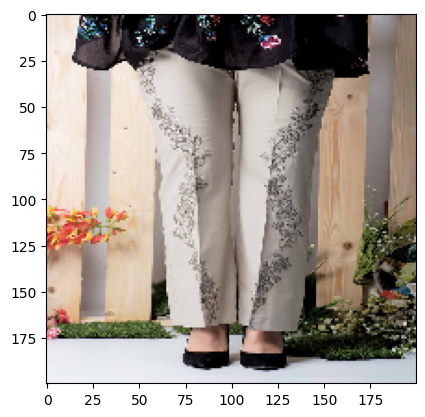

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Light


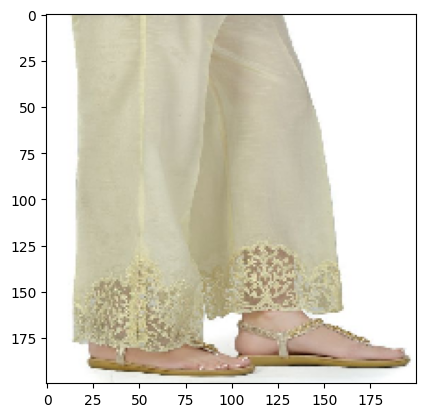

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Light


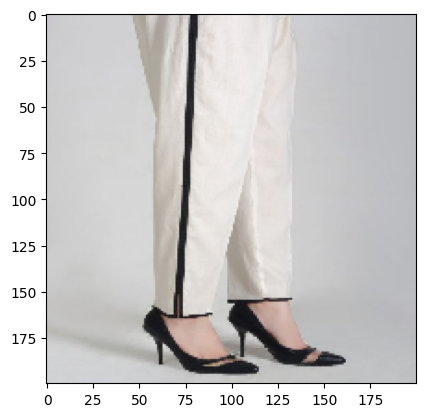

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Light


In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = r"D:\AI\tro_cnn\test"



for filename in os.listdir(dir_path):
    img_path = os.path.join(dir_path, filename)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    result = loaded_model.predict(X)
    prediction = np.argmax(result) 
    
    if prediction == 0:
        print("Dark")
    else:
        print('Light')
